# Crime Data Cleaning (Table 2)

## Initial Data Cleaning

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read in the dataset for crimes recorded in Victoria
vic_crimes = pd.read_csv("Data/crime_table2.csv", low_memory=False).dropna(how='any')
vic_crimes["Year"] = vic_crimes["Year"].astype(int)
vic_crimes

,Year,Year ending,Police Service Area,Local Government Area,Offence Division,Offence Subdivision,Offence Subgroup,Incidents Recorded,"PSA Rate per 100,000 population","LGA Rate per 100,000 population"
0,2023,December,Ballarat,Ballarat,A Crimes against the person,A10 Homicide and related offences,A10 Homicide and related offences,2.0,1.59,1.70
1,2023,December,Ballarat,Ballarat,A Crimes against the person,A20 Assault and related offences,A211 FV Serious assault,138.0,109.83,116.99
2,2023,December,Ballarat,Ballarat,A Crimes against the person,A20 Assault and related offences,A212 Non-FV Serious assault,146.0,116.20,123.78
3,2023,December,Ballarat,Ballarat,A Crimes against the person,A20 Assault and related offences,"A22 Assault police, emergency services or othe...",31.0,24.67,26.28
4,2023,December,Ballarat,Ballarat,A Crimes against the person,A20 Assault and related offences,A231 FV Common assault,227.0,180.66,192.45
...,...,...,...,...,...,...,...,...,...,...
50325,2014,December,Yarra Ranges,Yarra Ranges,F Other offences,F30 Other government regulatory offences,F39 Other government regulatory offences,1.0,0.66,0.66
50326,2014,December,Yarra Ranges,Yarra Ranges,F Other offences,F90 Miscellaneous offences,F92 Public health and safety offences,4.0,2.63,2.63
50327,2014,December,Yarra Ranges,Yarra Ranges,F Other offences,F90 Miscellaneous offences,F93 Cruelty to animals,4.0,2.63,2.63
50328,2014,December,Yarra Ranges,Yarra Ranges,F Other offences,F90 Miscellaneous offences,F94 Dangerous substance offences,1.0,0.66,0.66


In [3]:
# Filter to only show data in 2023
crime_23 = vic_crimes.loc[vic_crimes["Year"] == 2023]
crime_23 = crime_23[["Local Government Area", "Offence Division", "Offence Subdivision", "Incidents Recorded", "LGA Rate per 100,000 population"]]
crime_23

,Local Government Area,Offence Division,Offence Subdivision,Incidents Recorded,"LGA Rate per 100,000 population"
0,Ballarat,A Crimes against the person,A10 Homicide and related offences,2.0,1.70
1,Ballarat,A Crimes against the person,A20 Assault and related offences,138.0,116.99
2,Ballarat,A Crimes against the person,A20 Assault and related offences,146.0,123.78
3,Ballarat,A Crimes against the person,A20 Assault and related offences,31.0,26.28
4,Ballarat,A Crimes against the person,A20 Assault and related offences,227.0,192.45
...,...,...,...,...,...
4936,Yarra Ranges,F Other offences,F20 Transport regulation offences,5.0,3.15
4937,Yarra Ranges,F Other offences,F30 Other government regulatory offences,4.0,2.52
4938,Yarra Ranges,F Other offences,F30 Other government regulatory offences,1.0,0.63
4939,Yarra Ranges,F Other offences,F90 Miscellaneous offences,1.0,0.63


## Crime Incidents in All LGA

In [4]:
# Groupby LGA to analysis by incidents by LGA
lga_group = crime_23.groupby("Local Government Area")
lga_incidents = pd.DataFrame(lga_group["LGA Rate per 100,000 population"].sum()).reset_index()
lga_incidents

,Local Government Area,"LGA Rate per 100,000 population"
0,Alpine,2418.08
1,Ararat,8327.36
2,Ballarat,7401.14
3,Banyule,4553.61
4,Bass Coast,5092.90
...,...,...
74,Wodonga,6999.27
75,Wyndham,4404.93
76,Yarra,10406.93
77,Yarra Ranges,3040.97


In [5]:
# Split DF into two
first = lga_incidents.iloc[:40,:]
second = lga_incidents.iloc[40:,:]

In [6]:
# Create function to create bar graphs
def bar_graph(data, title=""):
    lga = data["Local Government Area"]
    rate = data["LGA Rate per 100,000 population"]
    plt.bar(lga, rate)
    plt.xticks(rotation=90, fontsize='xx-small')
    plt.title(title)
    plt.xlabel("Local Government Area")
    plt.ylabel("Rate (per 100,000 population)")
    plt.ylim(0,16000)
    plt.show

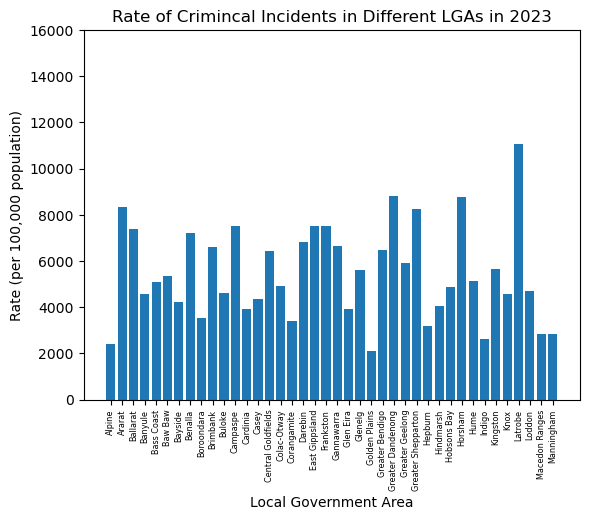

In [7]:
# Graph incidents recorded for the first half
bar_graph(first, title="Rate of Crimincal Incidents in Different LGAs in 2023")
## Graph limit was set to 16,000 to compare with the second graph

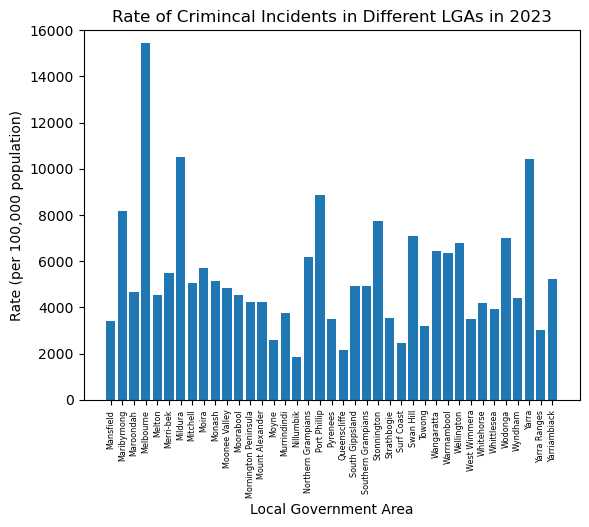

In [8]:
# Graph incidents recorded for the second half
bar_graph(second, title="Rate of Crimincal Incidents in Different LGAs in 2023")

In [9]:
# Sort DataFrame
sorted_lga_incidents = lga_incidents.sort_values(by="LGA Rate per 100,000 population", ascending=False)
sorted_lga_incidents

,Local Government Area,"LGA Rate per 100,000 population"
43,Melbourne,15451.74
36,Latrobe,11063.65
46,Mildura,10514.90
76,Yarra,10406.93
58,Port Phillip,8869.34
...,...,...
65,Surf Coast,2449.13
0,Alpine,2418.08
60,Queenscliffe,2166.78
23,Golden Plains,2109.88


In [10]:
# Reset index
sorted_lga_incidents = sorted_lga_incidents.reset_index()

In [11]:
# Create horizontal bar chart 


## Top 10 LGA According to Incidents Reported

In [12]:
# Get top 10 LGA
top_10 = sorted_lga_incidents.iloc[:10,:]
top_10

,index,Local Government Area,"LGA Rate per 100,000 population"
0,43,Melbourne,15451.74
1,36,Latrobe,11063.65
2,46,Mildura,10514.90
3,76,Yarra,10406.93
4,58,Port Phillip,8869.34
5,25,Greater Dandenong,8816.78
6,31,Horsham,8769.09
7,1,Ararat,8327.36
8,27,Greater Shepparton,8237.70
9,41,Maribyrnong,8189.51


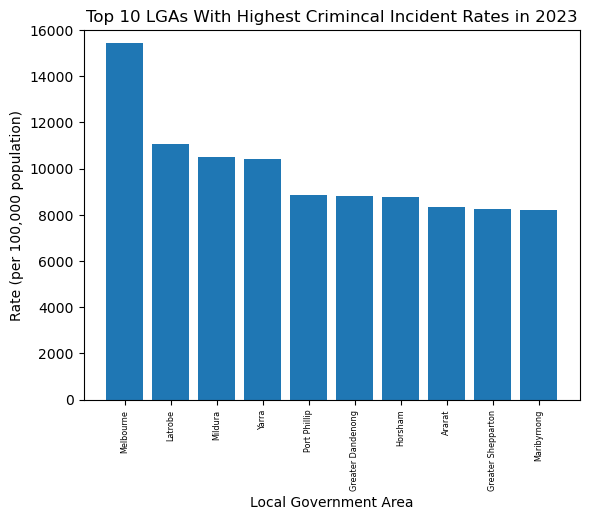

In [13]:
# Graph the top 10
bar_graph(top_10, title="Top 10 LGAs With Highest Crimincal Incident Rates in 2023")

## Distribution of Crime Types (Pie Chart)

In [14]:
# Use crime_23 to make pie chart of crime divisions
# Groupby crime divisions
divisions_group = crime_23.groupby("Offence Division")
division_incidents = pd.DataFrame(divisions_group["Incidents Recorded"].sum())
division_incidents

,Incidents Recorded
Offence Division,
A Crimes against the person,66787.0
B Property and deception offences,229330.0
C Drug offences,13740.0
D Public order and security offences,16395.0
E Justice procedures offences,57791.0
F Other offences,631.0


In [15]:
# Get total number of incidents
total_incidents = division_incidents["Incidents Recorded"].sum()

# Create lists
division = []
incidents = []

# Add to list
for index, row in division_incidents.itertuples():
    division.append(index)
    percentages = round((row / total_incidents * 100),2)
    incidents.append(percentages)

In [16]:
# Rename names in list
division[0] = "Crimes Against the Person"
division[1] = "Property & Deception offences"
division[2] = "Drug Offences"
division[3] = "Public Order & Security Offences"
division[4] = "Justice Procedures Offences"
division[5] = "Other Offences"
division

['Crimes Against the Person',
 'Property & Deception offences',
 'Drug Offences',
 'Public Order & Security Offences',
 'Justice Procedures Offences',
 'Other Offences']

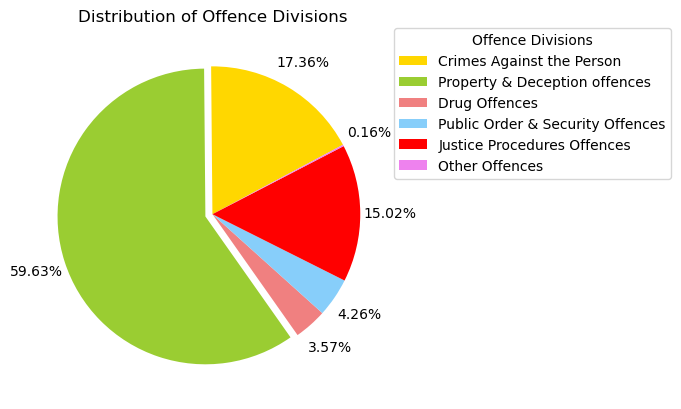

In [17]:
# Create pie chart for crime divisions
colours = ["gold", "yellowgreen", "lightcoral", "lightskyblue", "red", "violet"]
explode = [0,0.05,0,0,0,0]
plt.pie(incidents, autopct='%.02f%%', colors = colours, radius=1,
        startangle=28, explode=explode, pctdistance=1.2)
plt.title("Distribution of Offence Divisions")
plt.legend(division, bbox_to_anchor=(1.76,0.8), loc="center right", title="Offence Divisions")

## Change in Crime Type Over the Years

In [18]:
# Groupby year and offence division
crime_year = vic_crimes.groupby(["Offence Division", "Year"])["Incidents Recorded"]
crime_change_per_year = pd.DataFrame(crime_year.sum())

# Unstack to make it easier to read
crime_unstack = crime_change_per_year.unstack()
crime_unstack.columns = crime_unstack.columns.droplevel()
crime_unstack

Year,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Offence Division,,,,,,,,,,
A Crimes against the person,49480.0,51559.0,59290.0,60681.0,62098.0,64573.0,63890.0,64164.0,66092.0,66787.0
B Property and deception offences,224690.0,239898.0,270857.0,232703.0,233074.0,245864.0,207342.0,191701.0,193743.0,229330.0
C Drug offences,14152.0,15356.0,15608.0,14446.0,15532.0,16554.0,18690.0,13666.0,13917.0,13740.0
D Public order and security offences,25906.0,24850.0,24346.0,23657.0,24001.0,22128.0,19127.0,16185.0,17641.0,16395.0
E Justice procedures offences,28942.0,35858.0,47559.0,44962.0,48359.0,50920.0,54533.0,50920.0,55232.0,57791.0
F Other offences,835.0,805.0,793.0,736.0,815.0,690.0,37249.0,10638.0,934.0,631.0


In [19]:
# Plot graph
# Create variables for each offence division
person = 'A Crimes against the person'
deception = 'B Property and deception offences'
drug = 'C Drug offences'
public = 'D Public order and security offences'
justice = 'E Justice procedures offences'
other = 'F Other offences'

In [20]:
# Create a list of years for the x axis
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

In [21]:
# Create series for each offence division
person_over_time = crime_unstack.loc[person, years]
deception_over_time = crime_unstack.loc[deception, years]
drug_over_time = crime_unstack.loc[drug, years]
public_over_time = crime_unstack.loc[public, years]
justice_over_time = crime_unstack.loc[justice, years]
other_over_time = crime_unstack.loc[other, years]

<function matplotlib.pyplot.show(close=None, block=None)>

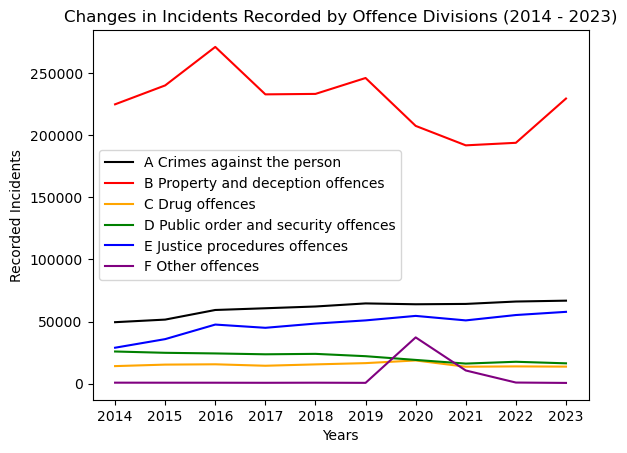

In [26]:
# Plot graphs
plt.plot(years, person_over_time, color='black', label=person)
plt.plot(years, deception_over_time, color='red', label=deception)
plt.plot(years, drug_over_time, color='orange', label=drug)
plt.plot(years, public_over_time, color='green', label=public)
plt.plot(years, justice_over_time, color='blue', label=justice)
plt.plot(years, other_over_time, color='purple', label=other)

# Format graph
plt.title("Changes in Incidents Recorded by Offence Divisions (2014 - 2023)")
plt.xlabel("Years")
plt.ylabel("Recorded Incidents")
plt.xticks(np.arange(min(years), max(years)+1, 1.0))
plt.legend(loc='center left')
plt.show